In [120]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from importlib import reload
import advance_util; reload(advance_util)
from advance_util import *

In [86]:
img=mpimg.imread("../test1.jpg")

In [87]:

def sobel_thresh_in_xory(gray, orient='x',sobel_kernel=3,thresh=(0, 255)): 
  
    if orient=='x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0,sobel_kernel)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1,sobel_kernel)
    abs_sobel = np.absolute(sobel)
    converted_sobel=np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(converted_sobel)
    thresh_min=thresh[0]
    thresh_max=thresh[1]
    binary_output[(converted_sobel >= thresh_min) & (converted_sobel <= thresh_max)] = 1
    return binary_output
 
 

Text(0.5, 1.0, 'kernel=15 thresh=(20,120)')

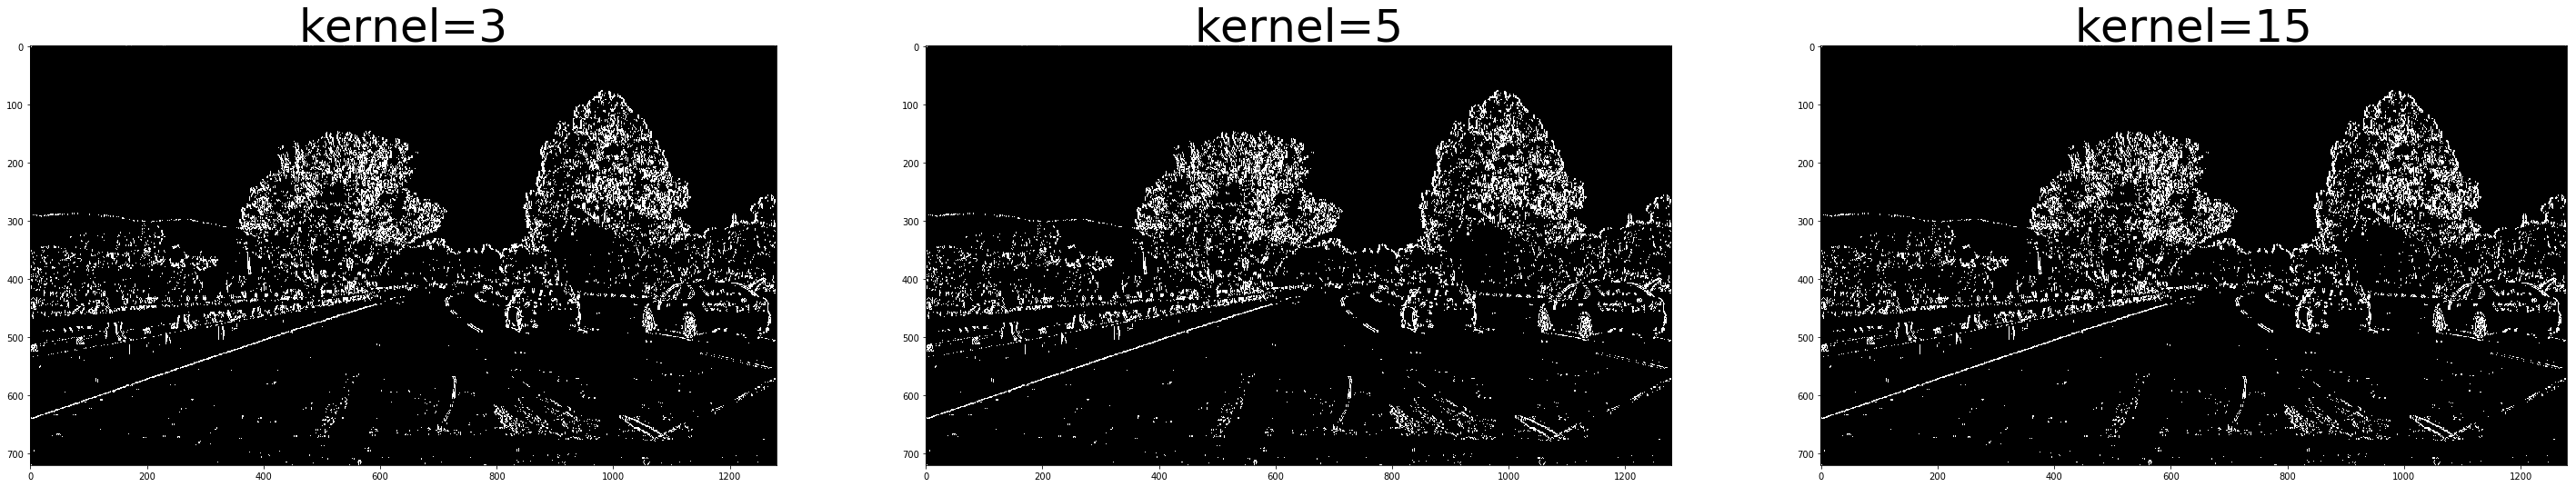

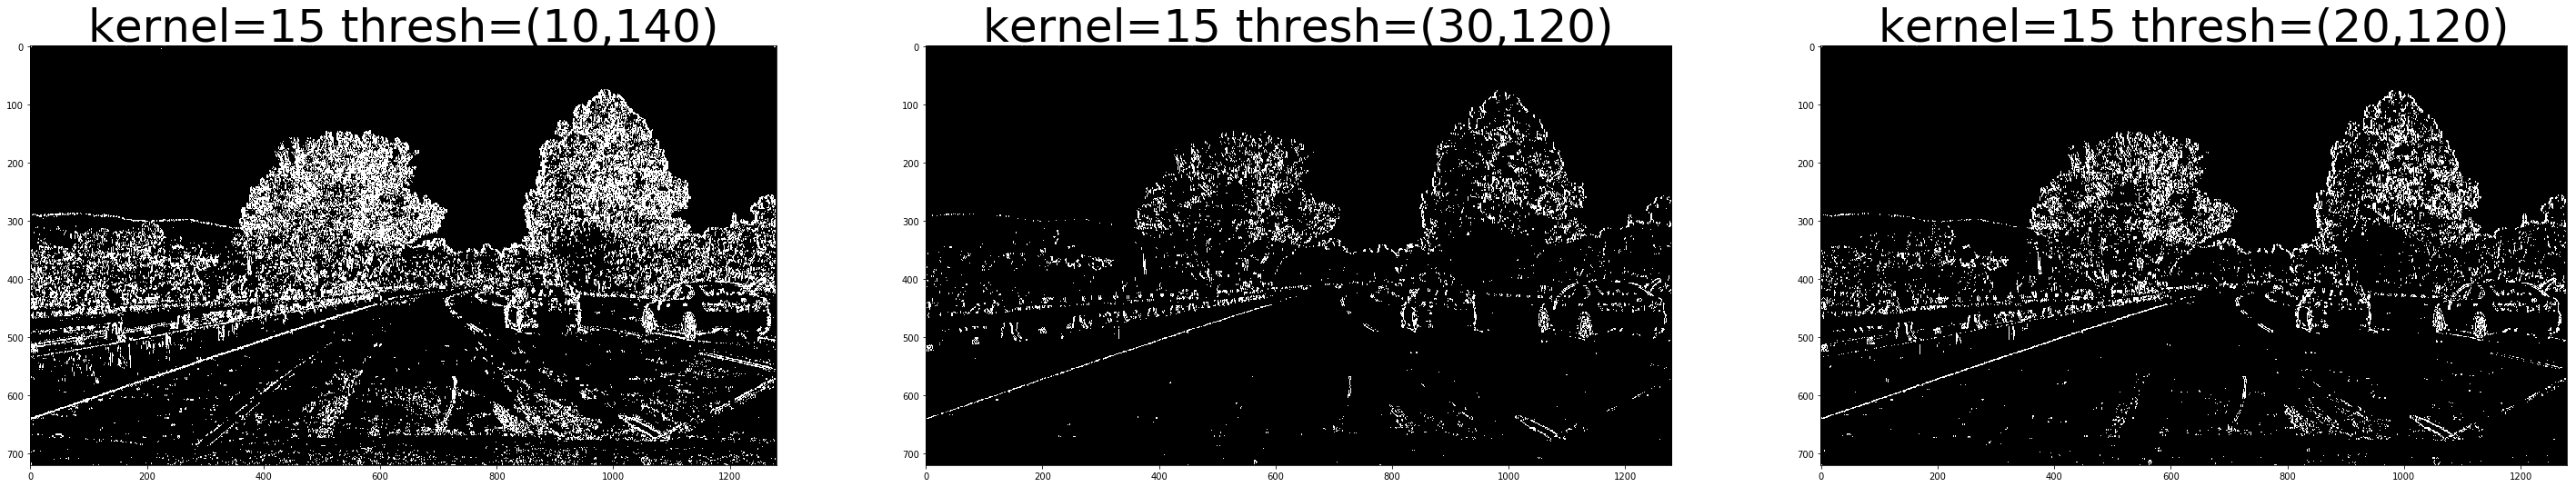

In [105]:
image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#Threshold in x direction 
output1=sobel_thresh_in_xory(image,orient='x',sobel_kernel=3,thresh=(20,120))
output2=sobel_thresh_in_xory(image,orient='x',sobel_kernel=5,thresh=(20,120))
output3=sobel_thresh_in_xory(image,orient='x',sobel_kernel=15,thresh=(20,120))
flag, (axis1, axis2,axis3) = plt.subplots(1, 3, figsize=(50, 25))
axis1.imshow(output1,cmap="gray")
axis1.set_title("kernel=3",fontsize=50)
axis2.imshow(output2,cmap="gray")
axis2.set_title("kernel=5",fontsize=50)
axis3.imshow(output3,cmap="gray")
axis3.set_title("kernel=15",fontsize=50)


output1=sobel_thresh_in_xory(image,orient='x',sobel_kernel=15,thresh=(10,140))
output2=sobel_thresh_in_xory(image,orient='x',sobel_kernel=15,thresh=(30,120))
output3=sobel_thresh_in_xory(image,orient='x',sobel_kernel=15,thresh=(20,120))
flag, (axis1, axis2,axis3) = plt.subplots(1, 3, figsize=(50, 25))
axis1.imshow(output1,cmap="gray")
axis1.set_title("kernel=15 thresh=(10,140)",fontsize=50)
axis2.imshow(output2,cmap="gray")
axis2.set_title("kernel=15 thresh=(30,120)",fontsize=50)
axis3.imshow(output3,cmap="gray")
axis3.set_title("kernel=15 thresh=(20,120)",fontsize=50)


In [96]:
best_x_sobel=sobel_thresh_in_xory(image,orient='x',sobel_kernel=15,thresh=(20,120))
best_y_sobel=sobel_thresh_in_xory(image,orient='y',sobel_kernel=15,thresh=(20,120))


In [102]:

def magnitude_thresh(gray, sobel_kernel=3, thresh=(0, 255))
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    abs_sobel=np.sqrt(sobelx*sobelx+sobely*sobely)
    
    converted_sobel=np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    binary_output = np.zeros_like(converted_sobel)
    thresh_min=thresh[0]
    thresh_max=thresh[1]
    binary_output[(converted_sobel >= thresh_min) & (converted_sobel <= thresh_max)] = 1
    return binary_output

In [109]:
best_xy_sobel=magnitude_thresh(image,sobel_kernel=15,thresh=(80,100))

In [112]:
def dir_threshold(gray, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    direction=np.arctan2(abs_sobely, abs_sobelx)
    binary_output = np.zeros_like(direction)
    binary_output[(direction>=thresh[0]) & (direction<=thresh[1])]=1
    return binary_output


In [113]:
def combine_threshold(best_x_sobel,best_y_sobel,best_xy_sobel,gray,kernel=3,thresh=(0,np.pi/2)):
    dir_mask=dir_threshold(gray,kernel,thresh)
    final_sobel=np.zeros_like(dir_mask)
    final_sobel[(best_x_sobel==1)|((best_y_sobel==1)&(best_xy_sobel==1)&(dir_mask==1))]=1
    return final_sobel
    

Text(0.5, 1.0, 'thresh=(0, np.pi/4)')

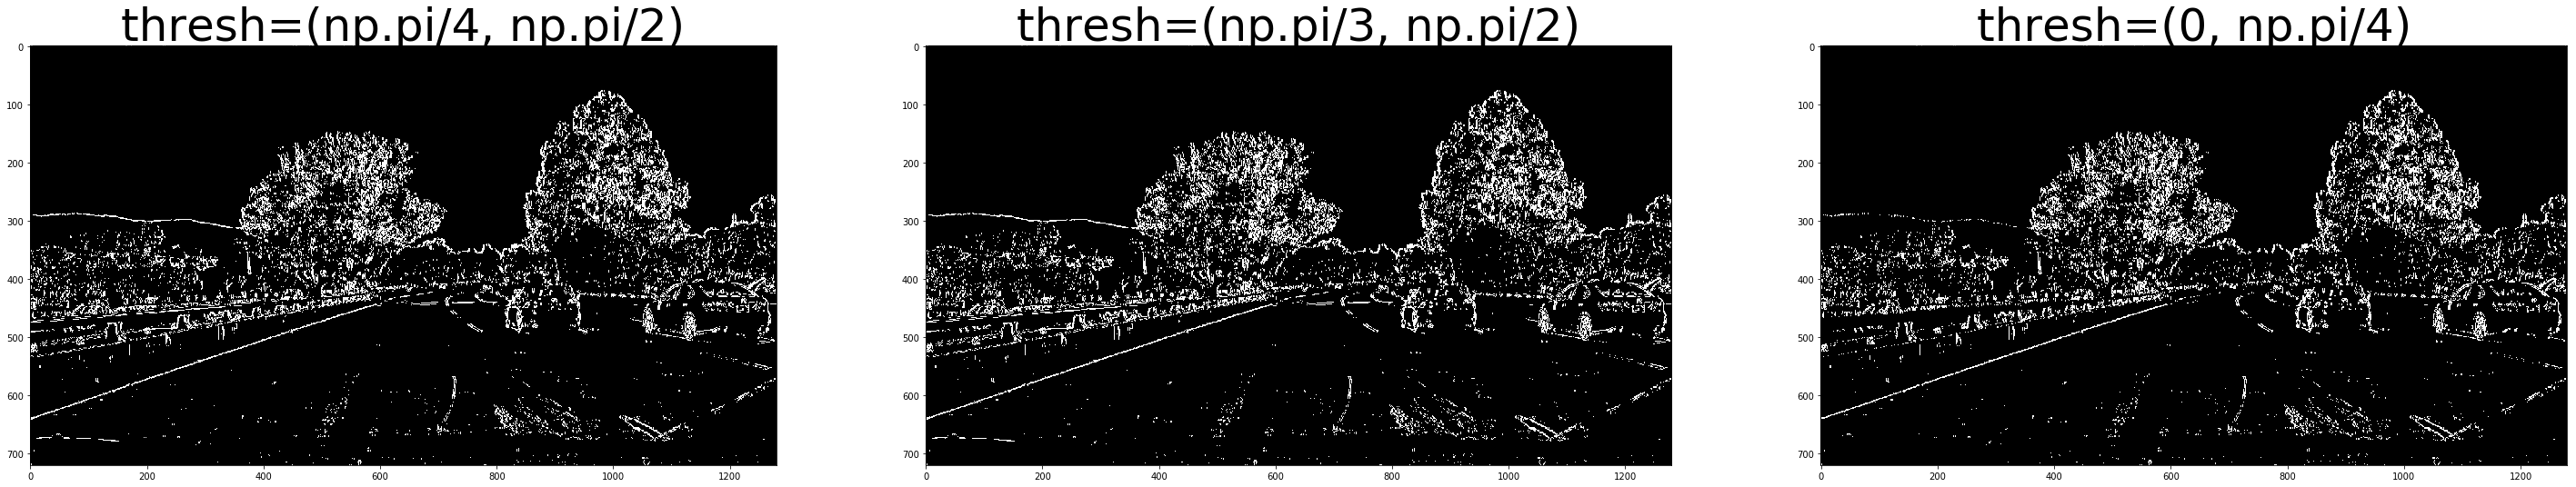

In [119]:
output1 = combine_threshold(best_x_sobel,best_y_sobel,best_xy_sobel,image, kernel=15, thresh=(np.pi/4, np.pi/2))      
output2 = combine_threshold(best_x_sobel,best_y_sobel,best_xy_sobel,image, kernel=15, thresh=(np.pi/3, np.pi/2))  
output3 = combine_threshold(best_x_sobel,best_y_sobel,best_xy_sobel,image, kernel=15, thresh=(0, np.pi/4))  
flag, (axis1, axis2,axis3) = plt.subplots(1, 3, figsize=(50, 25))
axis1.imshow(output1,cmap="gray")
axis1.set_title("thresh=(np.pi/4, np.pi/2)",fontsize=50)
axis2.imshow(output2,cmap="gray")
axis2.set_title("thresh=(np.pi/3, np.pi/2)",fontsize=50)
axis3.imshow(output3,cmap="gray")
axis3.set_title("thresh=(0, np.pi/4)",fontsize=50)